# Computer Vision and OpenCV
- Course: Self Driving Car Nanodegree
- Lesson: Advanced Lane Finding
- Topic: Undistort and Transform

    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

    objp = np.zeros((6*8,3), np.float32)
    objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)
    objpoints.append(objp)
    imgpoints.append(corners)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    src - from corners
    dst - manually defined
    M = cv2.getPerspectiveTransform(src, dst)
    
    img_size = img.shape[1::-1]
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

The pipeline to undistort an image due to the lens distortion, until reach the "bird-eye" view is detailed below.

The camera calibration parameters were extracted from the quiz 17. Undistort and Transform, based on the images from this repository: https://github.com/udacity/CarND-Camera-Calibration.

In [15]:
mtx = np.float32([[ 560.33148363, 0.,651.26264911],
 [   0., 561.3767079, 499.06540191],
 [   0.,            0., 1.        ]])

In [13]:
dist = np.float32([[ -2.32949182e-01,   6.17242707e-02,  -1.80423444e-05,   3.39635746e-05,
   -7.54961807e-03]]) 

In [16]:
print(mtx)

[[ 560.33148193    0.          651.26263428]
 [   0.          561.37670898  499.06539917]
 [   0.            0.            1.        ]]


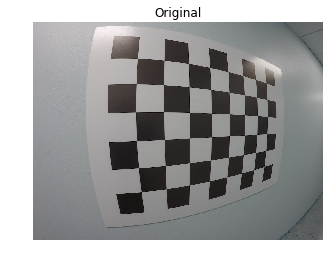

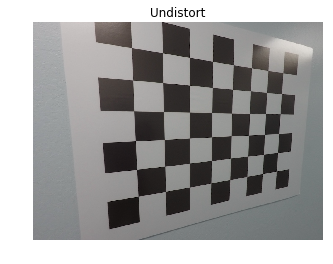

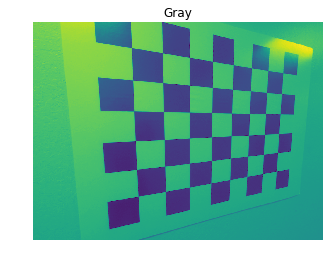

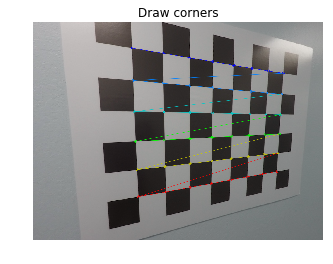

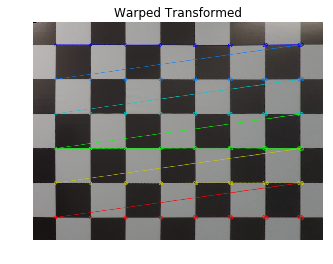

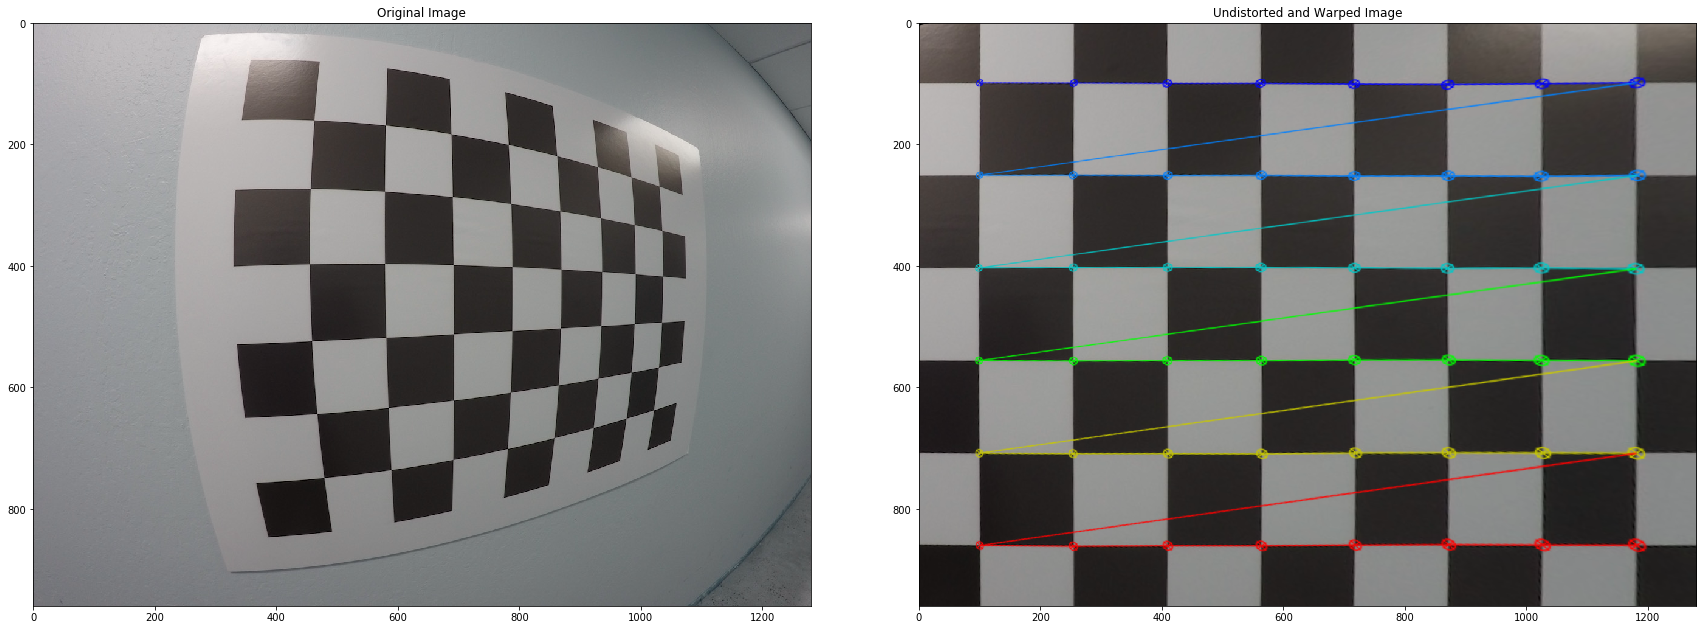

In [27]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
#dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
#mtx = dist_pickle["mtx"]
#dist = dist_pickle["dist"]

def pltImg(img, title):
    f, ax = plt.subplots(1,1)
    ax.axis('off')
    ax.set_title(title)
    ax.imshow(img)
    plt.show()

# Read in an image
#img = cv2.imread('test_image2.png')
img = cv2.imread('10-input-imgChessboard2.jpg')
pltImg(img, "Original")

nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)
    pltImg(img, "Undistort")
    # 2) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pltImg(gray, "Gray")
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    if ret == True:
            # a) draw corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        pltImg(img, "Draw corners")
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 # One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 # We recommend using the automatic detection of corners in your code
        # HMA: Solution
        src1 = np.float32([corners[0], corners[7], corners[40], corners[47]])
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        h = img.shape[0]
        w = img.shape[1]
        dst1 = np.float32([[0,0], [w, 0], [0,h], [w,h]])
        
        # Udacity: Solution
        src2 = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        offset = 100
        img_size = [img.shape[1], img.shape[0]]
        dst2 = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src2, dst2)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(img, M, img.shape[1::-1], flags=cv2.INTER_LINEAR)
        pltImg(warped, "Warped Transformed")
    else:
        print("NOK")
    #delete the next two lines
        M = None
        warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image')#, fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image')#, fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
